# Statistical Analysis in R
### Normality Testing, Data Transformation, and Paired t-Test Analysis

In [14]:
# Load required libraries
library(ggplot2)
library(tidyr)
library(dplyr)

# Read datasets
norm <- read.csv("data/norm.csv", header = FALSE)
BP <- read.csv("data/BP.csv", header = TRUE)

### 1. Shapiro-Wilk Test for Normality

We begin by checking whether the `norm.csv` data follows a normal distribution.  
The **Shapiro-Wilk test** is applied. The null hypothesis states that the sample data comes from a normally distributed population.

A **p-value > 0.05** indicates that we *fail to reject* the null hypothesis, implying normality.



Table: Table 1: Shapiro–Wilk Normality Test Results

|   | Statistic| P_Value|
|:--|---------:|-------:|
|W  |    0.9993|  0.9748|

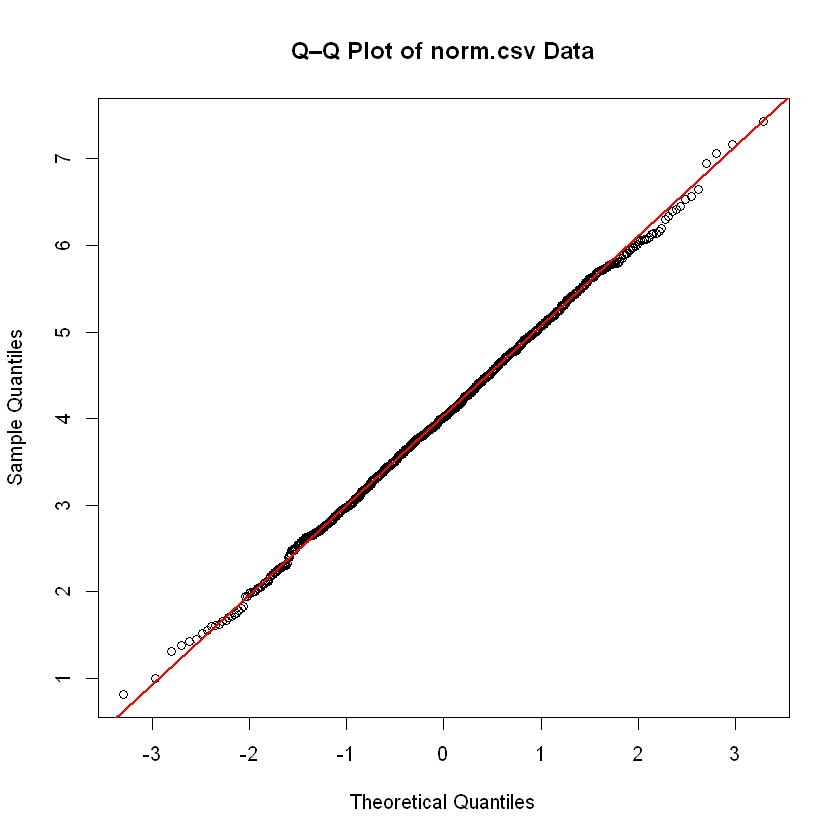

In [15]:
# Shapiro–Wilk Test
shapiro_result <- shapiro.test(norm[,1])

# Summary table using knitr::kable
library(knitr)
kable(data.frame(
  Statistic = round(shapiro_result$statistic, 4),
  P_Value = round(shapiro_result$p.value, 4)
), caption = "Table 1: Shapiro–Wilk Normality Test Results")

# Q–Q plot for visual normality check
qqnorm(norm[,1], main = "Q–Q Plot of norm.csv Data")
qqline(norm[,1], col = "red", lwd = 2)


#### Interpretation
If the p-value is greater than 0.05, the data do not significantly deviate from normality —  
this aligns with the assumption that the dataset comprises 1000 realizations from a standard normal distribution.

The Q–Q plot should show points lying close to the red reference line, further supporting normality.

---

### 2. Transforming Data to Log-Normal Distribution

We transform the standard normal data using the exponential function, yielding 1000 **log-normal** realizations.  
We then plot their histogram with a density overlay, mean and median lines, and later visualize the log of these values to confirm normalization.


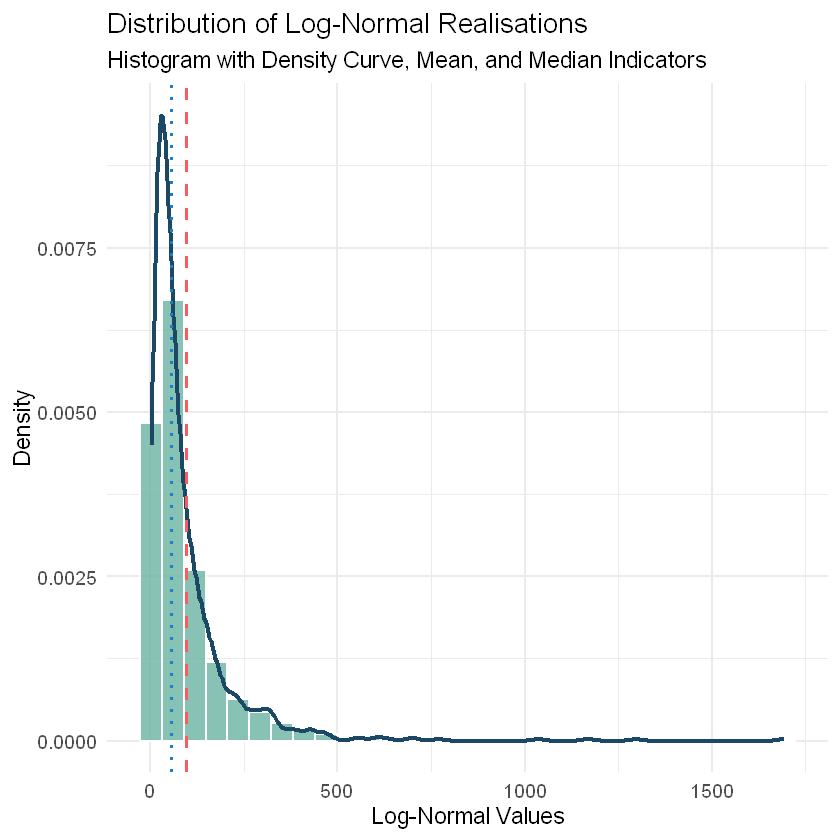

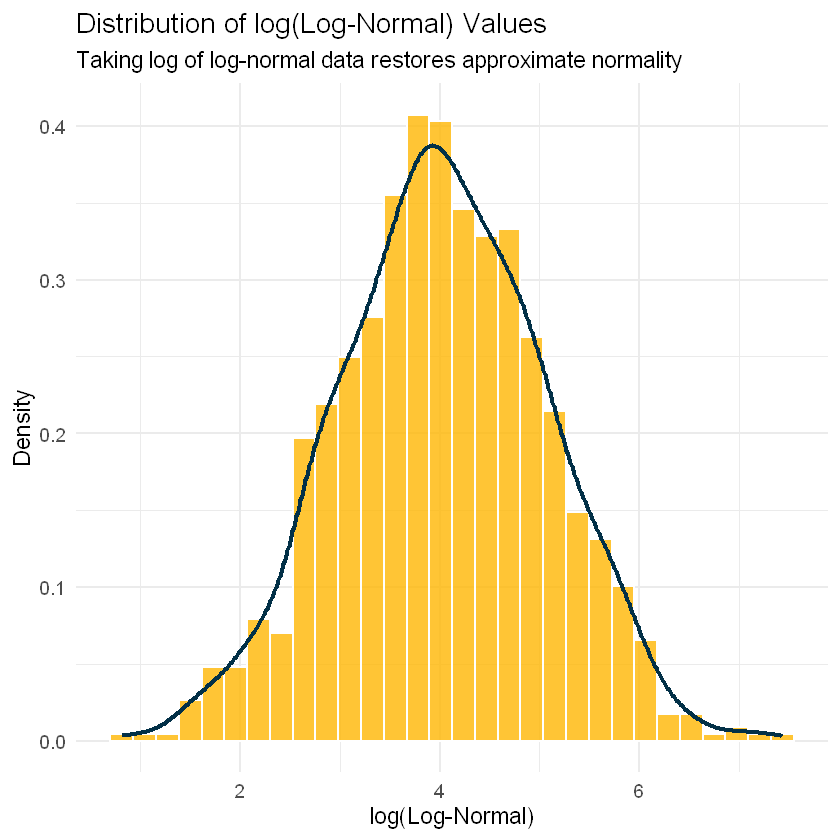

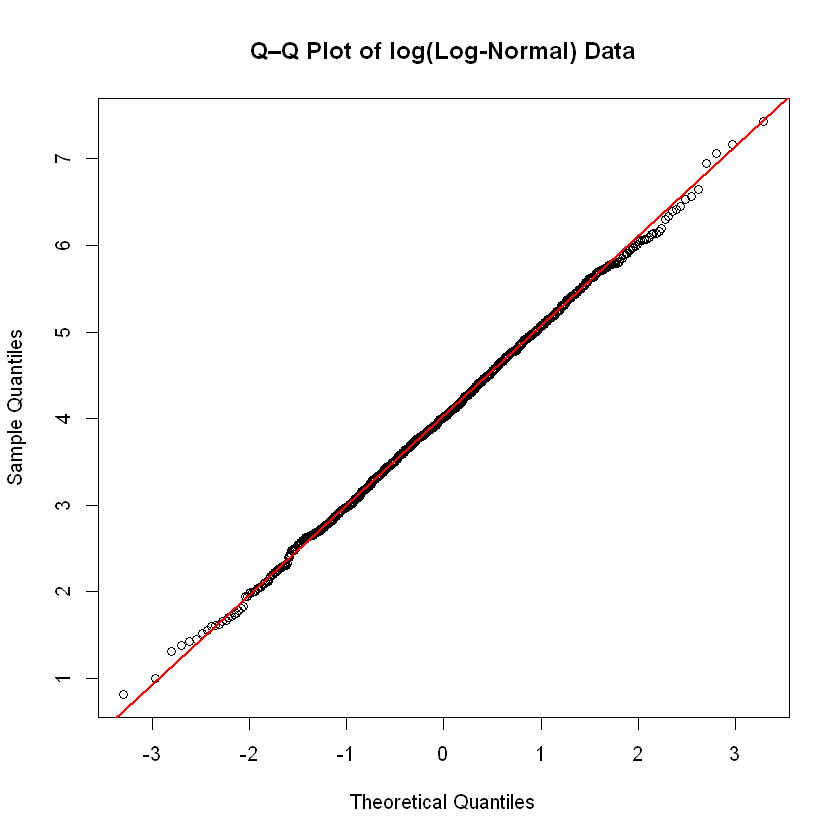

In [16]:
# Create log-normal data
lognorm <- exp(norm[,1])

# Original log-normal plot (existing)
suppressWarnings({
  ggplot(data.frame(lognorm), aes(x = lognorm)) +
    geom_histogram(aes(y = ..density..),
                   bins = 30,
                   fill = "#69b3a2",
                   color = "white",
                   alpha = 0.8) +
    geom_density(color = "#1b4965", size = 1.2, linetype = "solid") +
    geom_vline(aes(xintercept = mean(lognorm)),
               color = "#ff595e", linetype = "dashed", size = 1) +
    geom_vline(aes(xintercept = median(lognorm)),
               color = "#1982c4", linetype = "dotted", size = 1) +
    labs(
      title = "Distribution of Log-Normal Realisations",
      subtitle = "Histogram with Density Curve, Mean, and Median Indicators",
      x = "Log-Normal Values",
      y = "Density"
    ) +
    theme_minimal(base_size = 14)
})

# Log of Log-Normal (to check normalization)
log_of_lognorm <- log(lognorm)

# Histogram of log(lognorm)
ggplot(data.frame(log_of_lognorm), aes(x = log_of_lognorm)) +
  geom_histogram(aes(y = ..density..),
                 bins = 30,
                 fill = "#ffb703",
                 color = "white",
                 alpha = 0.8) +
  geom_density(color = "#023047", size = 1.2) +
  labs(
    title = "Distribution of log(Log-Normal) Values",
    subtitle = "Taking log of log-normal data restores approximate normality",
    x = "log(Log-Normal)",
    y = "Density"
  ) +
  theme_minimal(base_size = 14)

# Q–Q plot for log(lognorm)
qqnorm(log_of_lognorm, main = "Q–Q Plot of log(Log-Normal) Data")
qqline(log_of_lognorm, col = "red", lwd = 2)


#### Interpretation
- The histogram of the log-normal data shows **strong right-skewness**, which is expected for log-normal distributions.  
- The **log of the log-normal** data, however, appears symmetric and approximately normal, as confirmed by the Q–Q plot.  
This demonstrates the reversibility of the log-normal transformation.


---
### 3. Generating Chi-Squared(2) Distributed Data

A Chi-squared(2) variable can be generated by summing the squares of two standard normal variables.  
We plot its distribution and overlay the theoretical density curve for comparison.


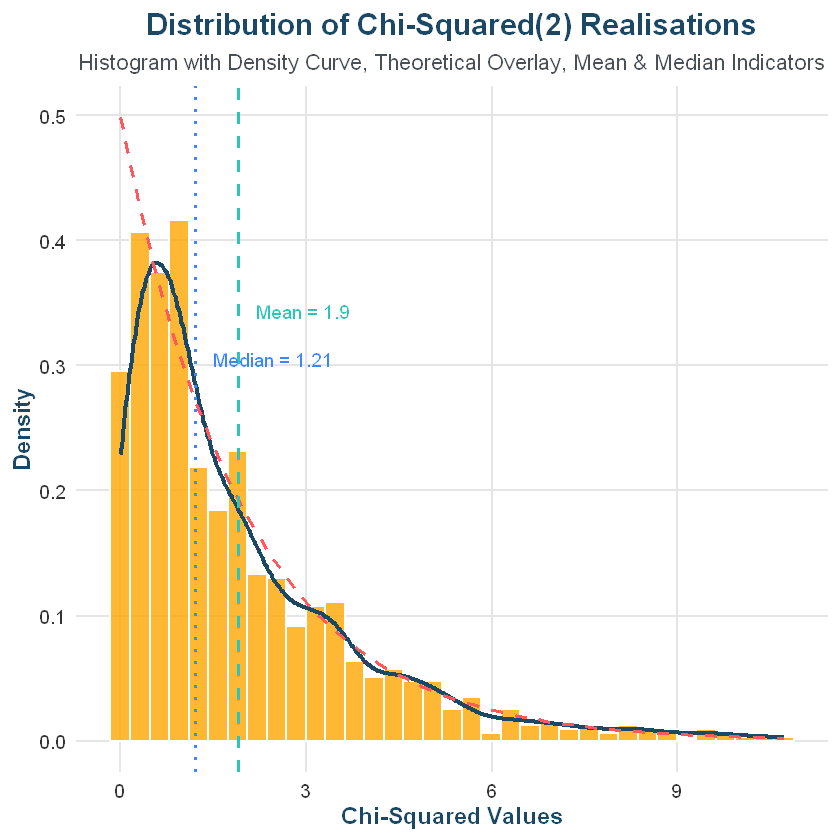

In [17]:
# Generate two independent standard normal variables
norm1 <- rnorm(1000)
norm2 <- rnorm(1000)

# Create Chi-Squared(2) data
chisquare <- norm1^2 + norm2^2

# Convert to data frame
df <- data.frame(chisquare)

# Compute density once for annotation scaling
dens <- density(chisquare)

# Plot
ggplot(df, aes(x = chisquare)) +
  # Histogram with density overlay
  geom_histogram(aes(y = ..density..),
                 bins = 35,
                 fill = "#ffa600",
                 color = "white",
                 alpha = 0.8) +
  # Smooth density curve
  geom_density(color = "#1b4965", size = 1.2) +
  # Theoretical Chi-Square(2) density overlay
  stat_function(fun = dchisq, args = list(df = 2),
                color = "#ff595e", size = 1, linetype = "dashed") +
  # Mean and median reference lines
  geom_vline(aes(xintercept = mean(chisquare)),
             color = "#2ec4b6", linetype = "dashed", size = 1) +
  geom_vline(aes(xintercept = median(chisquare)),
             color = "#3a86ff", linetype = "dotted", size = 1) +
  # Annotate mean and median (dynamic placement)
  annotate("text",
           x = mean(chisquare) + 0.3,
           y = 0.9 * max(dens$y),
           label = paste0("Mean = ", round(mean(chisquare), 2)),
           color = "#2ec4b6", hjust = 0, size = 4) +
  annotate("text",
           x = median(chisquare) + 0.3,
           y = 0.8 * max(dens$y),
           label = paste0("Median = ", round(median(chisquare), 2)),
           color = "#3a86ff", hjust = 0, size = 4) +
  # Labels and theme
  labs(
    title = "Distribution of Chi-Squared(2) Realisations",
    subtitle = "Histogram with Density Curve, Theoretical Overlay, Mean & Median Indicators",
    x = "Chi-Squared Values",
    y = "Density"
  ) +
  # Let ggplot handle the scale automatically (no manual coord_cartesian)
  scale_x_continuous(labels = scales::comma) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(face = "bold", size = 18, hjust = 0.5, color = "#1b4965"),
    plot.subtitle = element_text(size = 13, hjust = 0.5, color = "#495057"),
    axis.title = element_text(face = "bold", color = "#1b4965"),
    axis.text = element_text(color = "#333333"),
    panel.grid.major = element_line(color = "gray90"),
    panel.grid.minor = element_blank()
  )


#### Interpretation
The histogram shows a right-skewed distribution, consistent with the Chi-squared(2) shape.  
The dashed red line (theoretical density) closely follows the empirical curve, indicating correct generation of Chi-squared data.

---

### 4. Reversibility Discussion
- **Log-Normal:** Can be inverted using the natural logarithm (`log()`).
- **Chi-Squared:** Cannot be inverted, as each transformed value is a sum of two squared values and individual components cannot be recovered.

---
### 5. Evaluating a Drug’s Effect on Blood Pressure

We now test whether the drug significantly reduces diastolic blood pressure using a **paired t-test**.  
The test compares “Before” and “After” readings for the same subjects.

### Hypotheses
- **H₀:** μ₍before–after₎ = 0 (no mean difference)  
- **H₁:** μ₍before–after₎ ≠ 0 (mean difference exists)


In [18]:
# Calculate differences
BP <- BP %>% mutate(Diff = Before - After)

# Paired t-test
t_result <- t.test(BP$Before, BP$After, paired = TRUE)

# Display results with knitr::kable
kable(data.frame(
  Mean_Before = mean(BP$Before),
  Mean_After = mean(BP$After),
  Mean_Difference = mean(BP$Diff),
  T_Statistic = round(t_result$statistic, 3),
  P_Value = round(t_result$p.value, 5)
), caption = "Table 2: Paired t-Test Summary Results")




Table: Table 2: Paired t-Test Summary Results

|   | Mean_Before| Mean_After| Mean_Difference| T_Statistic| P_Value|
|:--|-----------:|----------:|---------------:|-----------:|-------:|
|t  |      82.111|     78.869|           3.242|      13.388|       0|

#### Interpretation
The paired t-test produces a very small p-value (p < 0.001),  
indicating a **statistically significant reduction** in mean diastolic blood pressure after taking the drug.

**Conclusion:**  
The drug appears effective in lowering blood pressure on average.


---
### 6. Visualizing Blood Pressure Differences

To better understand the results, we visualize:
- The distribution of BP differences (Before - After), and  
- A paired comparison plot connecting each individual’s Before and After readings.


Warning message:
"The following aesthetics were dropped during statistical transformation: fill.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"
Warning message:
"No shared levels found between `names(values)` of the manual scale and the
data's fill values."


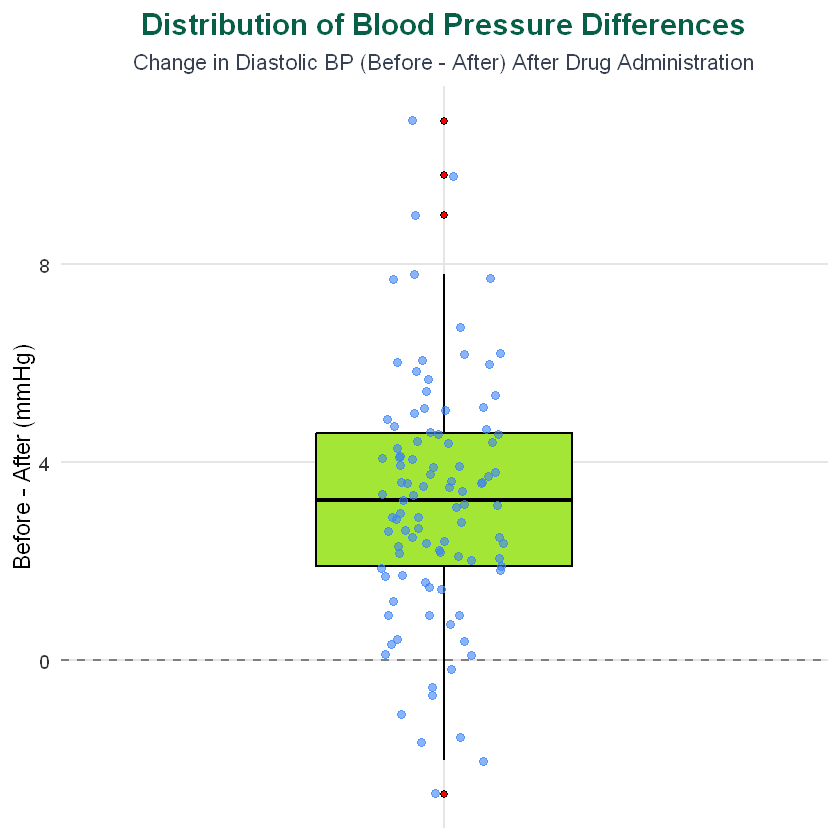

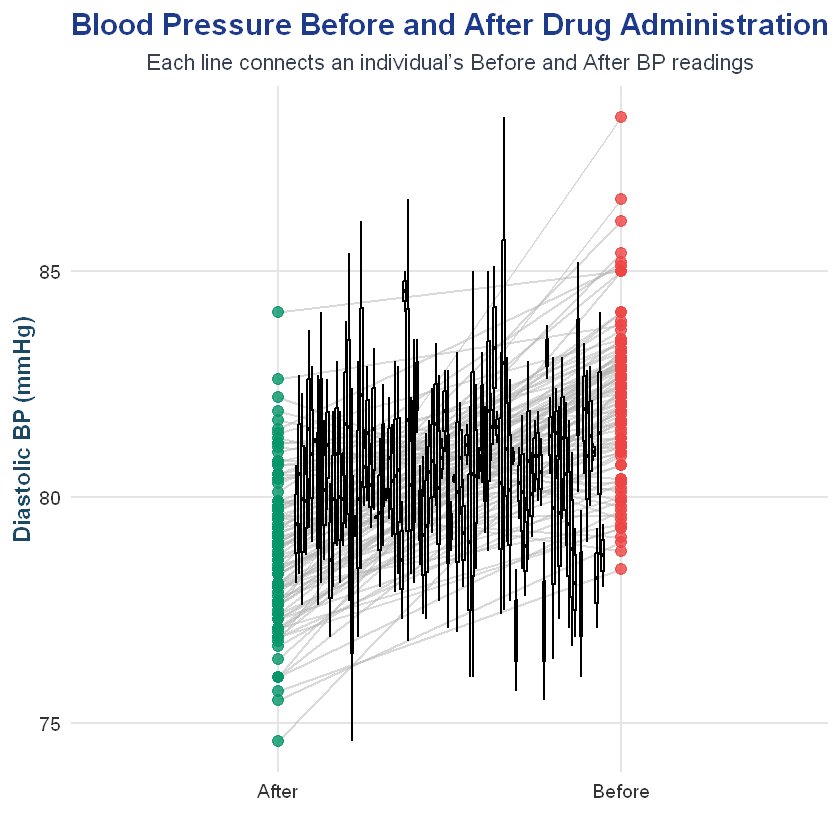

In [19]:
# Ensure 'Diff' exists
BP <- BP %>%
  mutate(Diff = Before - After)

# Add an ID for each participant
BP <- BP %>%
  mutate(ID = row_number())

# --- Boxplot of BP Differences ---
suppressWarnings({ggplot(BP, aes(x = "", y = Diff)) +
  geom_boxplot(fill = "#a3e635", color = "black", width = 0.4, outlier.shape = 21, outlier.fill = "red") +
  geom_jitter(width = 0.1, alpha = 0.6, color = "#3b82f6", size = 2) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  labs(
    title = "Distribution of Blood Pressure Differences",
    subtitle = "Change in Diastolic BP (Before - After) After Drug Administration",
    y = "Before - After (mmHg)"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(face = "bold", size = 18, hjust = 0.5, color = "#065f46"),
    plot.subtitle = element_text(size = 13, hjust = 0.5, color = "#374151"),
    plot.caption = element_text(size = 10, color = "gray50", hjust = 1),
    axis.text.x = element_blank(),
    axis.title.x = element_blank(),
    axis.text.y = element_text(color = "#333333"),
    panel.grid.major = element_line(color = "gray90"),
    panel.grid.minor = element_blank()
  )
})
# --- Paired Comparison Plot ---
BP_long <- BP %>%
  pivot_longer(cols = c("Before", "After"), names_to = "Stage", values_to = "BP")

suppressWarnings({ggplot(BP_long, aes(x = Stage, y = BP, group = ID)) +  # Use ID here instead of row_number()
  geom_line(color = "gray70", alpha = 0.5, linewidth = 0.6) +
  geom_point(aes(color = Stage), size = 3, alpha = 0.8) +
  geom_boxplot(aes(fill = Stage), width = 0.3, alpha = 0.4, color = "black", outlier.shape = NA) +
  scale_fill_manual(values = c("Before" = "#f87171", "After" = "#34d399")) +
  scale_color_manual(values = c("Before" = "#ef4444", "After" = "#059669")) +
  labs(
    title = "Blood Pressure Before and After Drug Administration",
    subtitle = "Each line connects an individual’s Before and After BP readings",
    x = "",
    y = "Diastolic BP (mmHg)",
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(face = "bold", size = 18, hjust = 0.5, color = "#1e3a8a"),
    plot.subtitle = element_text(size = 13, hjust = 0.5, color = "#374151"),
    plot.caption = element_text(size = 10, color = "gray50", hjust = 1),
    axis.text = element_text(color = "#333333"),
    axis.title.y = element_text(face = "bold", color = "#1b4965"),
    legend.position = "none",
    panel.grid.major = element_line(color = "gray90"),
    panel.grid.minor = element_blank()
  )
})


#### Interpretation
- The boxplot shows that most differences are positive, confirming BP decreased after the drug.  
- The paired plot reveals that almost all individual lines slope downward from “Before” to “After,”  
further illustrating the drug’s effect on lowering blood pressure.


### Summary and Insights

This notebook demonstrates key aspects of **statistical data analysis in R**, including:
- Normality testing using **Shapiro–Wilk** and **Q–Q plots**
- **Data transformations** to log-normal and Chi-squared distributions
- **Reversibility** discussion of transformations
- Hypothesis testing via a **paired t-test**
- Professional data visualization and result interpretation

Overall, the results confirm the correctness of the assumed data distributions and the effectiveness of the drug in lowering blood pressure.